In [51]:
import logging
from pathlib import Path

from astropy.coordinates import SkyCoord
from astropy.visualization import simple_norm
from IPython.display import HTML
from matplotlib import animation
from matplotlib import pyplot as plt
from statix.exposure import Exposure
from statix.plotting import plot_image, plot_lightcurve

plt.style.use("Solarize_Light2")

logging.basicConfig(level=logging.INFO)
data_path = Path(".", "data")


def source_marker(ax, coords):
    ax.scatter(*coords, marker="o", edgecolor="w", s=100, c="none", linewidths=2, ls=":")

In [2]:
event_list_path = data_path / "pnevt.fits"
attitude_path = data_path / "att.fits"
xmmexp = Exposure(event_list_path, attitude_path)

# Transient source used as input for the simulation
ssc = SkyCoord(0, 0, unit="deg")
spc = ssc.to_pixel(xmmexp.image.wcs)

xmmexp

Exp.ID: S003 [EPN camera], Obs.ID: 0000000000
Energy band for products: SOFT (0.5-2.0 keV)
Nominal pointing: 00h00m00s +00d00m00s
PA: 90.0 deg

In [3]:
srclist_emldet = xmmexp.detect_sources(method="emldetect", likemin=6)

INFO:statix.exposure:Detecting sources using emldetect algorithm...


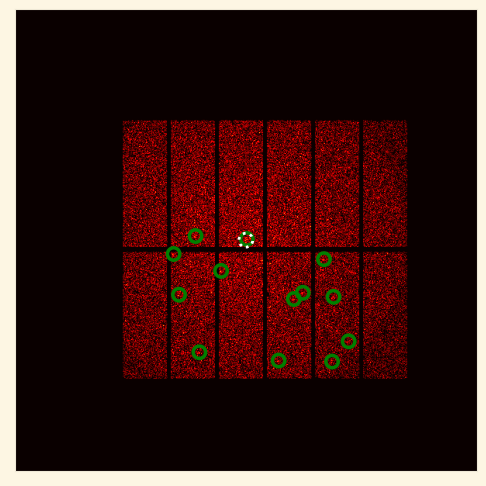

In [4]:
mask_detections = srclist_emldet["EP_DET_ML"] > 6
detections = srclist_emldet[mask_detections]

fig = plt.figure(figsize=(6, 6))
ax = plt.subplot(111)
plot_image(ax, xmmexp.image.data, use_norm=False, cmap="hot", srclist=detections)
source_marker(ax, spc)
plt.show()

In [5]:
srclist_msvst2d, image_msvst = xmmexp.detect_sources(method="msvst2d", sigma_level=3)

INFO:statix.exposure:Detecting sources using msvst2d algorithm...
INFO:statix.source_detection:Filling image gaps...
INFO:statix.source_detection:Denoising image using 2D MSVST...
INFO:statix.source_detection:Finding peaks in denoised image...
INFO:statix.source_detection:Extracting counts for 174 sources...
INFO:statix.exposure:Calculating background image
INFO:statix.counts:Extracting light-curves...
INFO:statix.source_detection:Calculating fluxes...


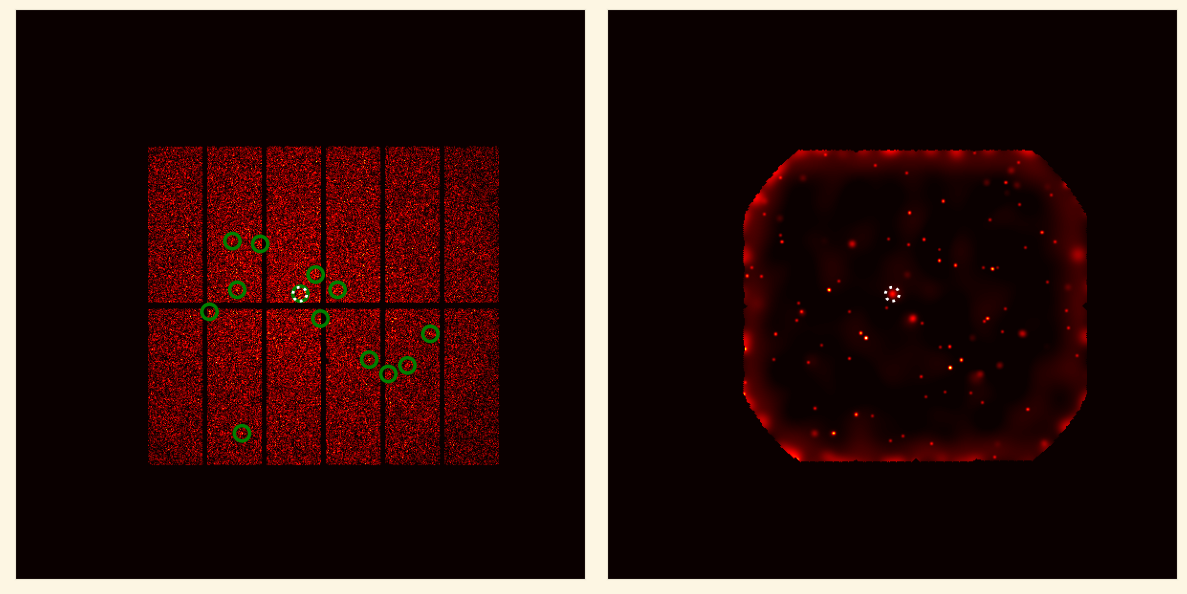

In [21]:
mask_detections = srclist_msvst2d["DET_ML"] > 6
detections = srclist_msvst2d[mask_detections]

norm = simple_norm(xmmexp.image.data, "asinh")

fig = plt.figure(figsize=(12, 6))
ax = plt.subplot(121)
plot_image(ax, xmmexp.image.data, use_norm=False, cmap="hot", srclist=detections)
source_marker(ax, spc)

ax = plt.subplot(122)
plot_image(ax, image_msvst.data, use_norm=False, cmap="hot")
source_marker(ax, spc)

plt.tight_layout()
plt.show()

In [7]:
srclist_msvst, cube_msvst = xmmexp.detect_sources(method="msvst2d1d", sigma_level=3, time_sigma_level=3)

INFO:statix.exposure:Detecting sources using msvst2d1d algorithm...
INFO:statix.exposure:Existing inpainted cube loaded!
INFO:statix.source_detection:Denoising cube using 2D+1D MSVST...
INFO:statix.source_detection:Finding peaks in denoised cube...
INFO:statix.source_detection:Extracting counts in optimized time intervals for 2094 sources...
INFO:statix.exposure:Calculating background cube
INFO:statix.counts:Extracting light-curves...
INFO:statix.source_detection:Calculating fluxes...


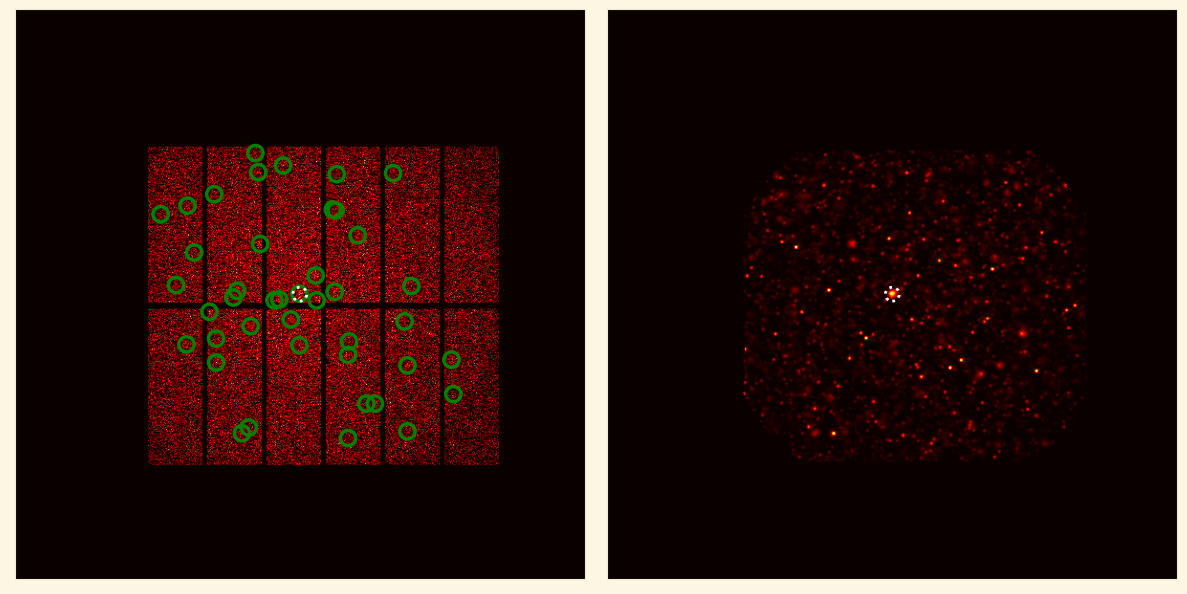

In [22]:
mask_detections = srclist_msvst["DET_ML"] > 6
detections = srclist_msvst[mask_detections]

norm = simple_norm(xmmexp.cube.time_integrated.data, "asinh")

fig = plt.figure(figsize=(12, 6))
ax = plt.subplot(121)
plot_image(ax, xmmexp.cube.time_integrated.data, use_norm=False, cmap="hot", srclist=detections)
source_marker(ax, spc)

ax = plt.subplot(122)
plot_image(ax, cube_msvst.time_integrated.data, use_norm=False, cmap="hot")
source_marker(ax, spc)

plt.tight_layout()
plt.show()

In [9]:
srclist_msvst2, cube_msvst2 = xmmexp.detect_sources(method="msvst2d1d", sigma_level=4, time_sigma_level=4)

INFO:statix.exposure:Detecting sources using msvst2d1d algorithm...
INFO:statix.source_detection:Denoising cube using 2D+1D MSVST...
INFO:statix.source_detection:Finding peaks in denoised cube...
INFO:statix.source_detection:Extracting counts in optimized time intervals for 164 sources...
INFO:statix.counts:Extracting light-curves...
INFO:statix.source_detection:Calculating fluxes...


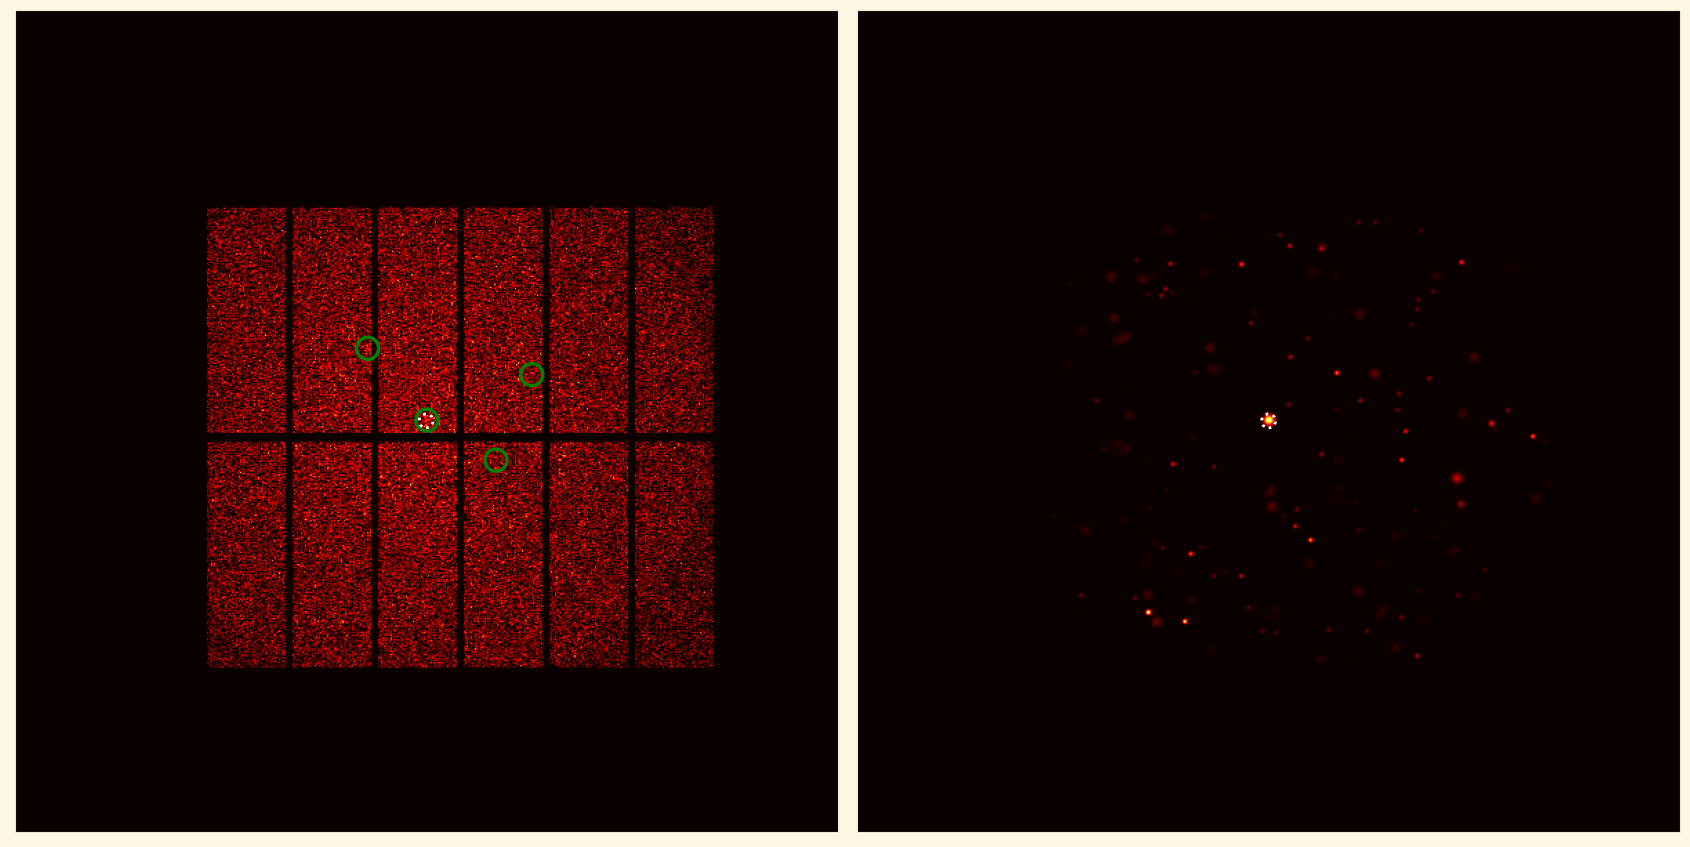

In [23]:
mask_detections = srclist_msvst2["DET_ML"] > 6
detections = srclist_msvst2[mask_detections]

norm = simple_norm(xmmexp.cube.time_integrated.data, "linear")

fig = plt.figure(figsize=(17, 9))
ax = plt.subplot(121)
plot_image(ax, xmmexp.cube.time_integrated.data, use_norm=False, cmap="hot", srclist=detections)
source_marker(ax, spc)

ax = plt.subplot(122)
plot_image(ax, cube_msvst2.time_integrated.data, use_norm=False, cmap="hot")
source_marker(ax, spc)

plt.tight_layout()
plt.show()

(-0.5, 39.5, -0.5, 39.5)

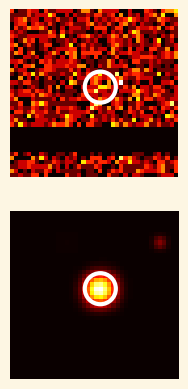

In [50]:
xmmexp.cube.time_integrated.data

ds = 20
center_data = xmmexp.cube.time_integrated.data[int(spc[0])-ds:int(spc[0])+ds, int(spc[1])-ds:int(spc[1])+ds]
center_msvst = cube_msvst2.time_integrated.data[int(spc[0])-ds:int(spc[0])+ds, int(spc[1])-ds:int(spc[1])+ds]

plt.subplot(221)
plt.imshow(center_data, origin="lower", cmap="hot")
plt.scatter(ds + 1, ds + 1, marker="o", edgecolor="w", s=500, c="none", linewidths=3)
plt.axis("off")

plt.subplot(223)
plt.imshow(center_msvst, origin="lower", cmap="hot")
plt.scatter(ds + 1, ds + 1, marker="o", edgecolor="w", s=500, c="none", linewidths=3)
plt.axis("off")

In [106]:
norm_data = simple_norm(center_data, "linear")
norm_msvst = simple_norm(center_msvst, "asinh")

ds = 20
center_data = xmmexp.cube.data[:, int(spc[0])-ds:int(spc[0])+ds, int(spc[1])-ds:int(spc[1])+ds+1]
center_msvst = cube_msvst2.data[:, int(spc[0])-ds:int(spc[0])+ds, int(spc[1])-ds:int(spc[1])+ds+1]

lc = detections[2]["LC"]
lc_bb = detections[2]["LC_BB"]


fig, ax = plt.subplot_mosaic(
    [['A', 'C'], ['B', 'C']], width_ratios=[1,3], constrained_layout=True, figsize=(11, 5)
)
plot_lightcurve(ax["C"], lc, lc_bb)

ims = []
for frame, frame_msvst in zip(center_data, center_msvst):
    ims_frame = []

    im = ax["A"].imshow(frame, origin="lower", cmap="hot", norm=norm_data, animated=True)
    ax["A"].set_axis_off()
    ims_frame.append(im)

    im = ax["B"].imshow(frame_msvst, origin="lower", cmap="hot", norm=norm_msvst, animated=True)
    ax["B"].set_axis_off()
    ims_frame.append(im)
    
    im = ax["C"].axvline(len(ims), ls="--", color="C4")
    ims_frame.append(im)

    ims.append(ims_frame)

plt.close()

ani = animation.ArtistAnimation(fig, ims, interval=300, blit=True, repeat_delay=1000)
HTML(ani.to_jshtml())

INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.HTMLWriter'>
